In [12]:
import numpy as np
import pandas as pd
import os
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
print(os.listdir(r"C:\Users\Dell\Desktop\zzzzz\projet tutoré\interpetation using python\asl_alphabet_train\asl_alphabet_train"))

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [13]:
train_dir = "C:\\Users\\Dell\\Desktop\\zzzzz\\projet tutoré\\interpetation using python\\asl_alphabet_train\\asl_alphabet_train"
test_dir="C:\\Users\\Dell\\Desktop\\zzzzz\\projet tutoré\\interpetation using python\\asl_alphabet_test\\asl_alphabet_test"

unique_labels =  ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


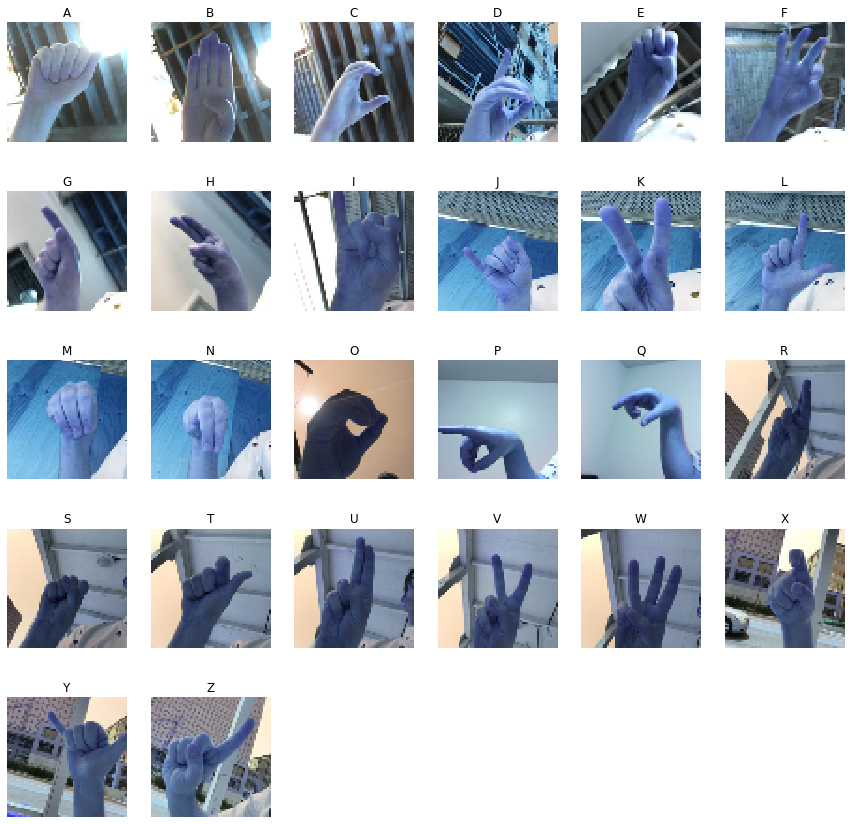

In [14]:
def load_unique():
    size_img = 64
    images_for_plot = []
    labels_for_plot = []
    for folder in os.listdir(train_dir):
        p1=train_dir+"\\"+folder
        newp1= p1.replace(os.sep, '/')
        for image in os.listdir(newp1):
            p2=train_dir+"\\"+folder+"\\"+image
            newp2= p2.replace(os.sep, '/')
            final_img = plt.imread(newp2)
            if final_img is not None:
                final_img = cv2.resize(final_img, (size_img,size_img))
                final_img = cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB)
                images_for_plot.append(final_img)
                labels_for_plot.append(folder)
                break
    return images_for_plot, labels_for_plot

images_for_plot, labels_for_plot = load_unique()
print("unique_labels = ", labels_for_plot)

fig = plt.figure(figsize = (15,15))
def plot_images(fig, image, label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image)
    plt.title(label)
    return

image_index = 0
row = 5
col = 6
for i in range(1,(row*col-3)):
    plot_images(fig, images_for_plot[image_index], labels_for_plot[image_index], row, col, i)
    image_index = image_index + 1
plt.show()

In [15]:
labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,
                   'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,
                   'Z':25}

images = []
labels = []
size_img = 64
print("LOADING DATA FROM : ",end = "")
p3=train_dir
newp3= p3.replace("\\", '/')
for folder in os.listdir(newp3):
    p1=train_dir+"\\"+folder
    newp1= p1.replace("\\", '/')
    for image in os.listdir(newp1):            
        p2=train_dir+"\\"+folder+"\\"+image
        newp2= p2.replace("\\", '/')
        temp_img = plt.imread(newp2)
        if temp_img is not None:
            temp_img = cv2.resize(temp_img, (size_img,size_img))
            temp_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB)
            images.append(temp_img)
            labels.append(labels_dict[folder])

images = np.array(images)
images = images.astype('float32')/255.0
print("")
print(len(images))
print(len(labels))
labels = keras.utils.to_categorical(labels,num_classes=26)
    
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.05)
    
print()
print('Loaded', len(X_train),'images for training,','Train data shape =',X_train.shape)
print('Loaded', len(X_test),'images for testing','Test data shape =',X_test.shape)


LOADING DATA FROM : 
8580
8580

Loaded 8151 images for training, Train data shape = (8151, 64, 64, 3)
Loaded 429 images for testing Test data shape = (429, 64, 64, 3)


C:/Users/Dell/Desktop/zzzzz/projet tutoré/interpetation using python/asl_alphabet_train/asl_alphabet_train/A/A1.JPG
<class 'NoneType'>


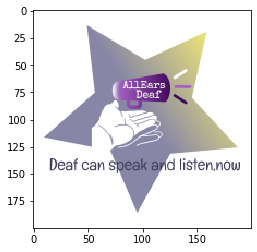

In [16]:
import os
folder='A'
image='A1.JPG'
p2=train_dir+"\\"+folder+"\\"+image
newp2= p2.replace("\\", '/')
print(newp2)
temp_img = cv2.imread("Desktop/zzzzz/projet tutoré/logo.png")
pp=plt.imread('C:/Users/Dell/Desktop/zzzzz/projet tutoré/logo.png')
plt.imshow(pp)
print(type(temp_img))

In [17]:
def create_model():
    
    model = Sequential()
    
    model.add(Conv2D(16, kernel_size = [3,3], padding = 'same', activation = 'relu', input_shape = (64,64,3)))
    model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(Conv2D(128, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(512, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
    model.add(Dense(29, activation = 'softmax'))
    
    model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ["accuracy"])
    
    print("MODEL CREATED")
    model.summary()
    
    return model

def fit_model():
    model_hist = model.fit(X_train, Y_train, batch_size = 64, epochs = 20, validation_split = 0.1)
    return model_hist 

In [ ]:
model2 = create_model()
curr_model_hist = fit_model()

MODEL CREATED
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 32)        9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7

In [ ]:
plt.plot(curr_model_hist.history['accuracy'])
plt.plot(curr_model_hist.history['val_accuracy'])
plt.legend(['train', 'test'], loc='lower right')
plt.title('accuracy plot - train vs test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

plt.plot(curr_model_hist.history['loss'])
plt.plot(curr_model_hist.history['val_loss'])
plt.legend(['training loss', 'validation loss'], loc = 'upper right')
plt.title('loss plot - training vs vaidation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
evaluate_metrics = model.evaluate(X_test, Y_test)
print("\nEvaluation Accuracy = ", "{:.2f}%".format(evaluate_metrics[1]*100),"\nEvaluation loss = " ,"{:.6f}".format(evaluate_metrics[0]))

import keras
from keras.applications.vgg19 import VGG19

img_height = 64
img_width = 64
img_channels = 3
num_classes = 26
learning_rate = 1e-5
weights = 'C:/Users/Dell/Desktop/zzzzz/projet tutoré/interpetation using python/vgg19/vgg19.h5'

def build_model():
    base = VGG19(include_top = False, weights = weights, input_shape = (img_height, img_width, img_channels))
    X = base.output
    X = keras.layers.Flatten()(X)
    X = keras.layers.Dense(512, activation = 'relu')(X)
    X = keras.layers.Dropout(0.4)(X)
    X = keras.layers.BatchNormalization()(X)
    X = keras.layers.Dense(512, activation = 'relu')(X)
    X = keras.layers.Dropout(0.3)(X)
    X = keras.layers.BatchNormalization()(X)
    preds = keras.layers.Dense(26, activation = 'softmax')(X)
    model = keras.models.Model(inputs = base.input, outputs = preds)
    model.compile(optimizer = keras.optimizers.RMSprop(lr = learning_rate), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

model = build_model()
model.summary()
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience = 5, verbose = 0, restore_best_weights = True)]

history = model.fit(X_train, Y_train,
                    epochs = 15,
                    batch_size = 128,
                    validation_split = 0.05,
                    callbacks = callbacks)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'test'], loc='lower right')
plt.title('accuracy plot - train vs test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss', 'validation loss'], loc = 'upper right')
plt.title('loss plot - training vs vaidation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
evaluate_metrics = model.evaluate(X_test, Y_test)
print("\nEvaluation Accuracy = ", "{:.2f}%".format(evaluate_metrics[1]*100),"\nEvaluation loss = " ,"{:.6f}".format(evaluate_metrics[0]))

In [ ]:
def load_test_data():
    images = []
    names = []
    size = 64
    p4=test_dir
    newp4= p4.replace("\\", '/')
    for image in os.listdir(newp4):
        p5=test_dir+"\\"+image
        newp5= p5.replace("\\", '/')
        temp = plt.imread(newp5)
        if temp is not None:
            temp = cv2.resize(temp, (size,size))
            temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
            images.append(temp)
            names.append(image)
    images = np.array(images)
    images = images.astype('float32')/255.0
    return images, names

test_images, test_img_names = load_test_data()

In [ ]:
pred = [model.predict(image.reshape(1,64,64,3))[0] for image in test_images]
predictions=[]
for i in pred:
    i=i.tolist()
    predictions.append(i.index(max(i)))

In [ ]:
def get_labels_for_plot(predictions):
    predictions_labels = []
    for i in range(len(predictions)):
        for ins in labels_dict:
            if predictions[i] == labels_dict[ins]:
                predictions_labels.append(ins)
                break
    return predictions_labels

predictions_labels_plot = get_labels_for_plot(predictions)

In [ ]:
predfigure = plt.figure(figsize = (13,13))
def plot_image_1(fig, image, label,  predictions_label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image)
    title = "prediction : [" + str(predictions_label) + "] "+ "\n" + label
    plt.title(title)
    return
image_index = 0
row = 4
col = 7
for i in range(1,(row*col-1)):
    plot_image_1(predfigure, test_images[image_index], test_img_names[image_index],  predictions_labels_plot[image_index], row, col, i)
    image_index = image_index + 1
plt.show()

In [ ]:
path_to_model=r"C:\Users\Dell\Desktop\zzzzz\projet tutoré\interpetation using python\interpModel\model.pb"

In [ ]:
import tensorflow
converter = tensorflow.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
path=r"C:\Users\Dell\Desktop\zzzzz\projet tutoré\interpetation using python\interpModel\model1.tflite"
open(path, "wb").write(tflite_model)

#model.save(path_to_model)

In [ ]:
import pickle
p=r"C:\Users\Dell\Desktop\zzzzz\projet tutoré\interpetation using python\interpModel\acc.txt"
with open(p, "wb") as fp:   #Pickling
    pickle.dump(history.history['accuracy'], fp)

p=r"C:\Users\Dell\Desktop\zzzzz\projet tutoré\interpetation using python\interpModel\valacc.txt"
with open(p, "wb") as fp:   #Pickling
    pickle.dump(history.history['val_accuracy'], fp)

p=r"C:\Users\Dell\Desktop\zzzzz\projet tutoré\interpetation using python\interpModel\loss.txt"
with open(p, "wb") as fp:   #Pickling
    pickle.dump(history.history['loss'], fp)

p=r"C:\Users\Dell\Desktop\zzzzz\projet tutoré\interpetation using python\interpModel\valloss.txt"
with open(p, "wb") as fp:   #Pickling
    pickle.dump(history.history['val_loss'], fp)
p=r"C:\Users\Dell\Desktop\zzzzz\projet tutoré\interpetation using python\interpModel\accSurtest.txt"
with open(p, "wb") as fp:   #Pickling
    pickle.dump(["{:.2f}%".format(evaluate_metrics[1]*100),"{:.6f}".format(evaluate_metrics[0])], fp)
    


In [ ]:
model = keras.models.load_model(path_to_model)

In [ ]:
p=r"C:\Users\Dell\Desktop\zzzzz\projet tutoré\interpetation using python\interpModel\acc.txt"
with open(p, "rb") as fp:   # Unpickling
    a = pickle.load(fp)
p=r"C:\Users\Dell\Desktop\zzzzz\projet tutoré\interpetation using python\interpModel\valacc.txt"
with open(p, "rb") as fp:   # Unpickling
    b = pickle.load(fp)
p=r"C:\Users\Dell\Desktop\zzzzz\projet tutoré\interpetation using python\interpModel\loss.txt"
with open(p, "rb") as fp:   # Unpickling
    c = pickle.load(fp)
p=r"C:\Users\Dell\Desktop\zzzzz\projet tutoré\interpetation using python\interpModel\valloss.txt"
with open(p, "rb") as fp:   # Unpickling
    d = pickle.load(fp)
p=r"C:\Users\Dell\Desktop\zzzzz\projet tutoré\interpetation using python\interpModel\accSurtest.txt"
with open(p, "rb") as fp:   # Unpickling
    e = pickle.load(fp)
plt.plot(a)
plt.plot(b)
plt.legend(['train', 'test'], loc='lower right')
plt.title('accuracy plot - train vs test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

plt.plot(c)
plt.plot(d)
plt.legend(['training loss', 'validation loss'], loc = 'upper right')
plt.title('loss plot - training vs vaidation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
print("\nEvaluation Accuracy = ", e[1],"\nEvaluation loss = " ,e[0])


In [ ]:
data_dir="C:\\Users\\Dell\\Desktop\\zzzzz\\projet tutoré\\interpetation using python\\asl_alphabet_test\\asl_alphabet_test"
def load_data():
    images = []
    size = 64
    p6=data_dir
    newp6= p6.replace("\\", '/')
    for image in os.listdir(newp6):
        p7=data_dir+"\\"+image
        newp7= p7.replace("\\", '/')
        temp = plt.imread(newp7)
        if temp is not None:
            temp = cv2.resize(temp, (size,size))
            temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
            images.append(temp)
    images = np.array(images)
    images = images.astype('float32')/255.0
    return images

imagesForPred = load_data()

In [ ]:
pred = [model.predict(image.reshape(1,64,64,3))[0] for image in test_images]
predictions=[]
for i in pred:
    i=i.tolist()
    predictions.append(i.index(max(i)))

In [ ]:
labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,
                   'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,
                   'Z':25}
predfigure = plt.figure(figsize = (13,13))
def plot_image_1(fig, image,predictions_label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image)
    title = "prediction : [" + str(predictions_label) + "] "+ "\n" 
    plt.title(title)
    return
def get_labels_for_plot(predictions):
    predictions_labels = []
    for i in range(len(predictions)):
        for ins in labels_dict:
            if predictions[i] == labels_dict[ins]:
                predictions_labels.append(ins)
                break
    return predictions_labels

predictions_labels_plot = get_labels_for_plot(predictions)
image_index = 0
row = 4
col = 7
for i in range(1,(row*col-1)):
    plot_image_1(predfigure, imagesForPred[image_index],predictions_labels_plot[image_index], row, col, i)
    image_index = image_index + 1
plt.show()